In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [3]:
#gpus = tf.config.experimental.list_physical_devices('CPU')
#gpus

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf.config.experimental.list_physical_devices('GPU')#it can work with CPU
#for gpu in gpus: 
 #   tf.config.experimental.set_memory_growth(gpu, True)
# =>limited memory growth to make it take only what it need memory

In [5]:
import cv2
import imghdr

In [6]:
data_dir='Training_data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [8]:
os.listdir(os.path.join(data_dir,'black'))

['0a0502.png',
 '110011.png',
 '1d1817.png',
 'black1.png',
 'black10.png',
 'black11.png',
 'black12.png',
 'black13.png',
 'black14.png',
 'black15.png',
 'black16.png',
 'black17.png',
 'black18.png',
 'black19-.png',
 'black2.jpg',
 'black20.png',
 'black21.jpg',
 'black22.png',
 'black3.png',
 'black4.jpg',
 'black5.jpg',
 'black6.png',
 'black7.jpg',
 'black8.jpg',
 'black9.jpg']

In [9]:
img=cv2.imread(os.path.join(data_dir,'black','0a0502.png'))

In [10]:
img.shape

(200, 150, 3)

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
#to verify if there is a picture that don't have the extension bellow
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Training_data\pink\.ipynb_checkpoints


In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 282 files belonging to 12 classes.


In [13]:
#tf.keras.utils.image_dataset_from_directory?? #help

In [14]:
data_iterator = data.as_numpy_iterator() 
#allow us to acesse to our data
data_iterator

In [15]:
batch=data_iterator.next()#each run it come a new batch

In [16]:
len(batch)#1:image representation ,2 label

2

In [17]:
len(batch[0])

32

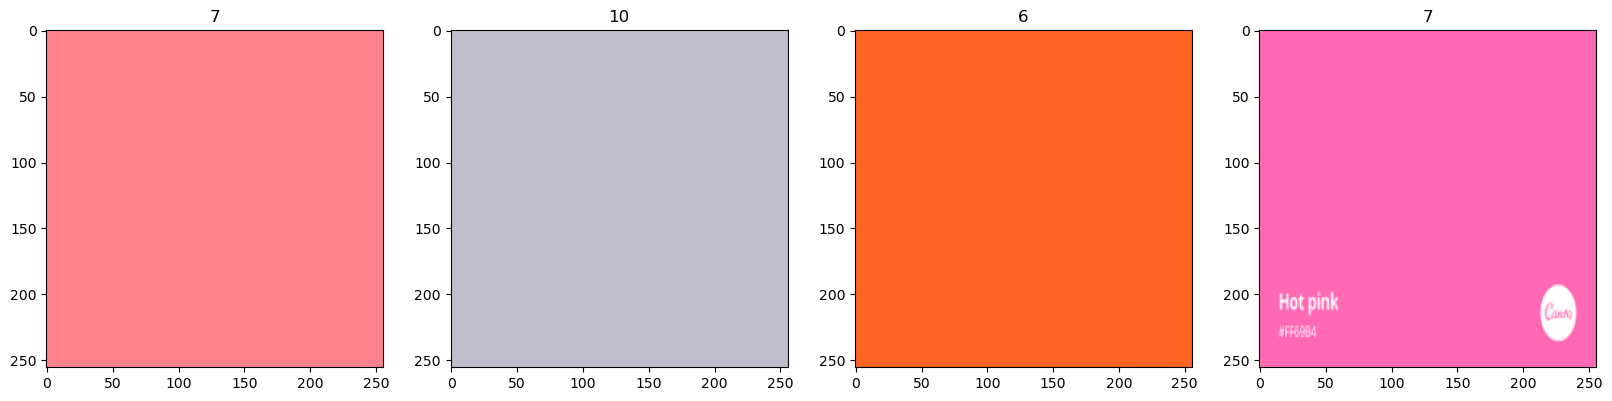

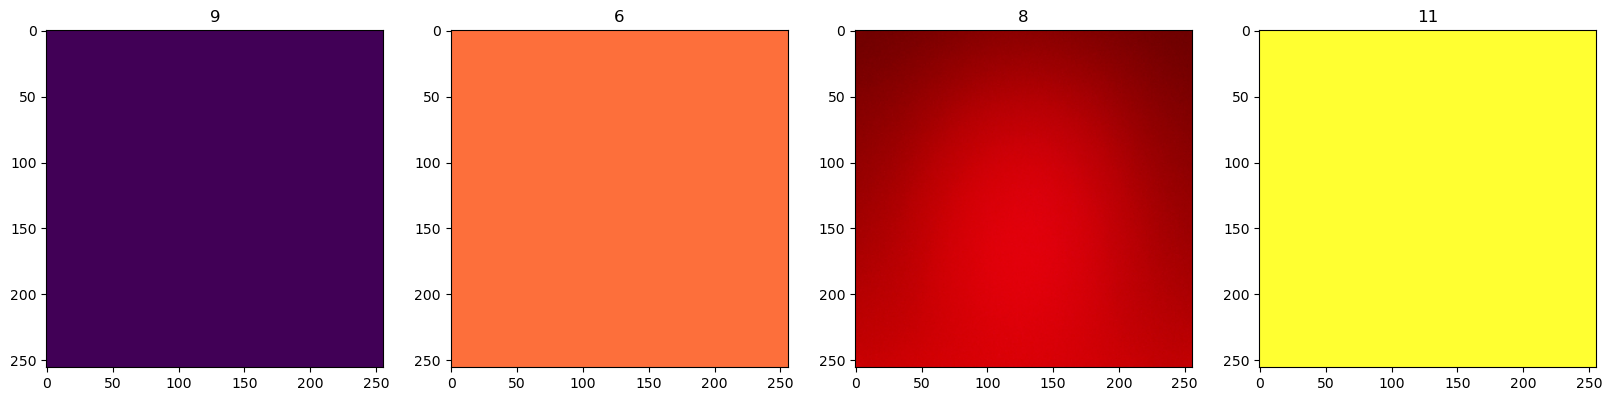

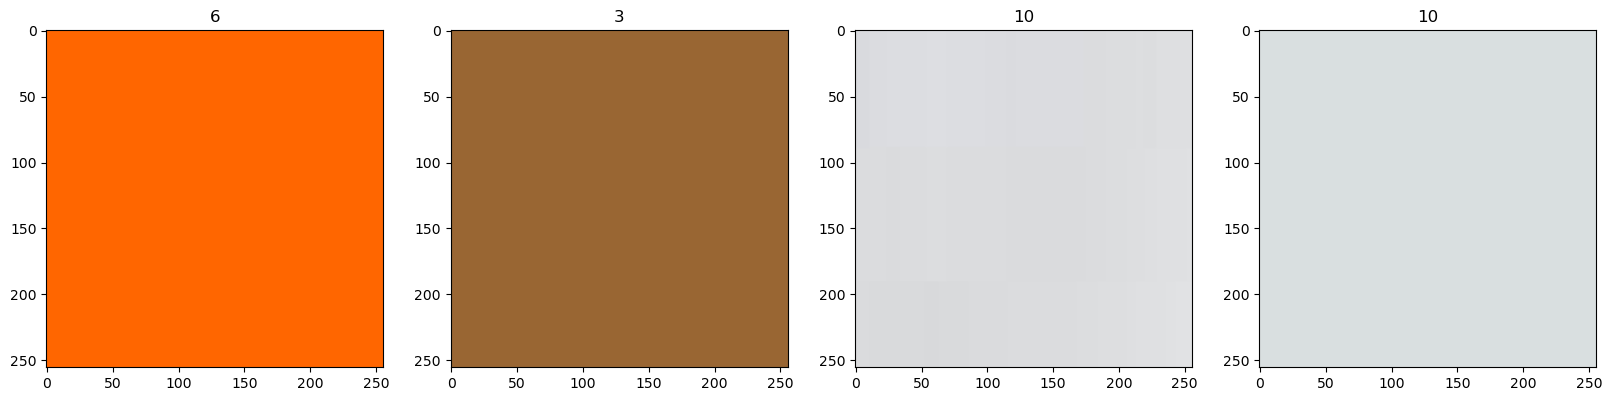

In [18]:
for i in range (3):
    batch=data_iterator.next()
    
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
        
    
    


In [19]:
scaleddata = data.map(lambda x,y: (x/255, y))
scaled_iterator = scaleddata.as_numpy_iterator() 


(256, 256, 3)

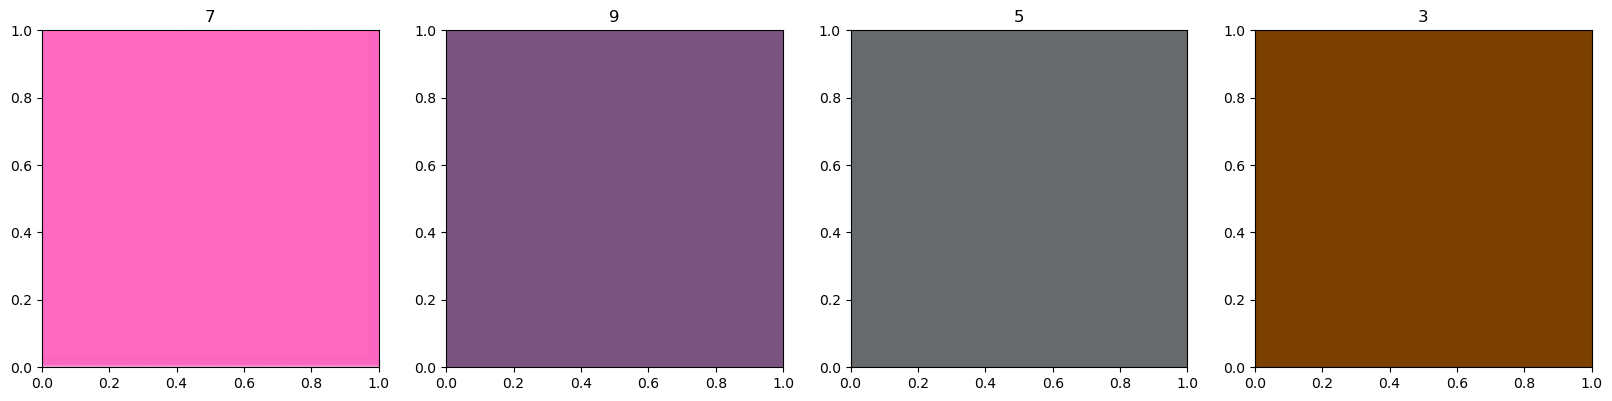

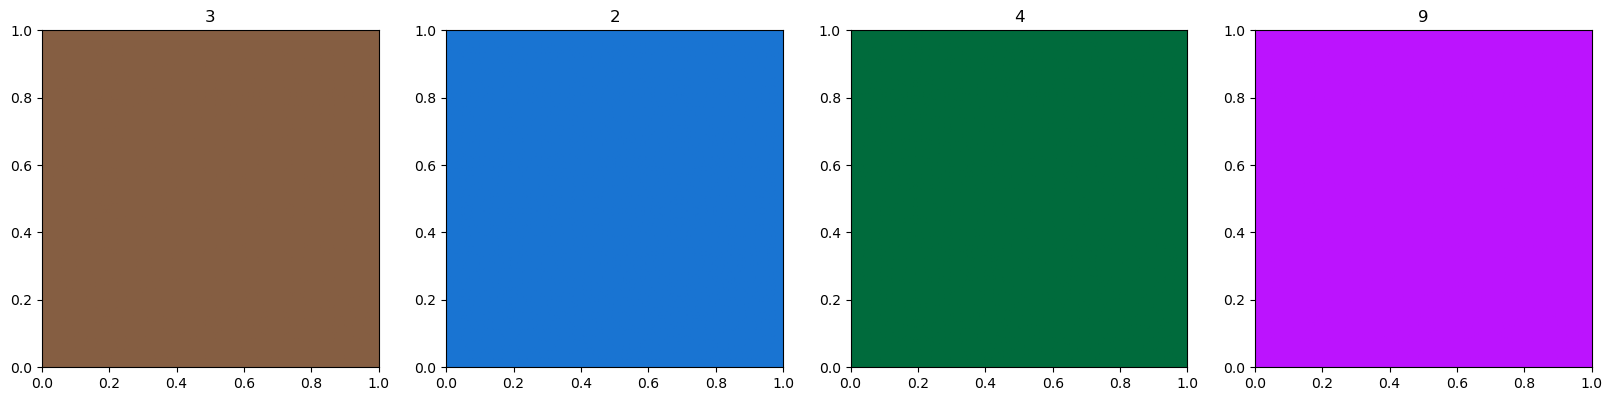

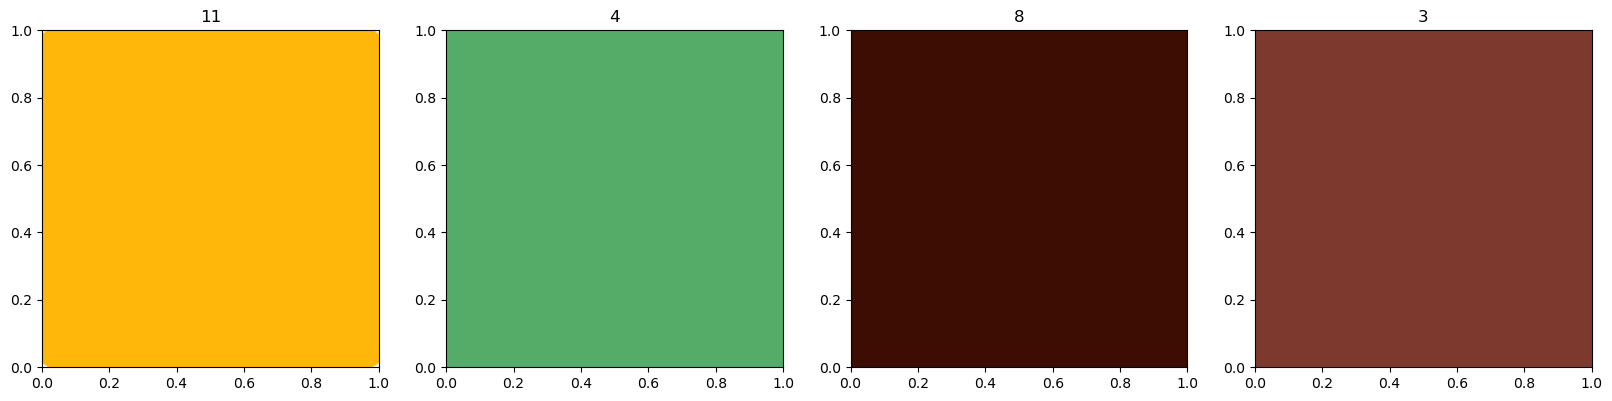

In [20]:
for i in range (3):
    batch=scaleddata.as_numpy_iterator().next()
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img,extent=[0, 1, 0, 1])
        ax[idx].title.set_text(batch[1][idx])
img.shape

In [21]:
len(data)

9

In [22]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
train_size = int(len(scaleddata)*.7) #train deep learning model
val_size = int(len(scaleddata)*.1)+1 #evaluating model
test_size = int(len(scaleddata)*.2)+1 #hold to test

In [24]:
print(train_size)
print(val_size)
print(test_size)
train_size+val_size+test_size

6
1
2


9

In [25]:
train = scaleddata.take(train_size) #how much data you will take in this particular data
val = scaleddata.skip(train_size).take(val_size)
test = scaleddata.skip(train_size+val_size).take(test_size)

In [26]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

In [27]:
def datatoXYtrain(x):
    # Assuming your dataset is stored in the variable 'dataset'

    # Initialize lists to store the first and second tensors from all batches
    X_train = []
    Y_train = []

    # Iterate through the dataset and collect the tensors from each batch
    for batch in x:
        first_tensor, second_tensor = batch
        X_train.append(first_tensor)
        Y_train.append(second_tensor)

    # Convert the lists of tensors to arrays (optional, if you want to work with numpy arrays)
    import numpy as np
    X_train = np.concatenate(X_train, axis=0)
    Y_train = np.concatenate(Y_train, axis=0)
    return X_train,Y_train

    # Now you can work with 'first_tensors' and 'second_tensors' containing all the data
X_train,Y_train=datatoXYtrain(train)
X_test,Y_test=datatoXYtrain(test)
X_val,Y_val=datatoXYtrain(val)

In [28]:
Y_test

array([ 9,  5,  5, 10,  9,  1,  7,  1,  9,  2, 11,  1,  5,  6, 11, 11,  1,
        3, 11, 11,  8, 11,  4,  5,  7,  1, 10,  2,  8, 11,  3,  2,  1,  4,
        6,  1, 11,  8,  5,  8,  3, 10, 11,  3,  5,  6,  3,  5, 10,  5, 10,
        6,  2,  1, 10,  7,  1,  9])

In [29]:
Y_train

array([ 4,  7,  9,  7,  5,  6,  5,  1,  9,  5,  9, 11,  3,  1, 11,  9,  9,
        2, 11,  5,  3,  1,  6,  6,  4,  3,  7,  2, 11,  5,  3, 10,  7,  8,
        6,  7,  7,  5,  4, 10,  7,  4, 10,  6, 10, 10,  2,  8,  3,  8,  1,
        6,  7, 11,  1,  5,  4,  4,  9,  9,  1,  3,  7,  7,  4,  2,  6,  3,
        2,  5,  3, 10,  6,  9,  9, 10,  8,  1,  5,  7,  2, 10,  5,  1,  6,
        7,  8,  3,  3,  2, 10,  1,  9,  6,  4,  4,  2,  1,  7,  7, 10,  6,
        6,  6,  1,  2,  2,  4, 11,  1,  2, 10, 11,  5,  3,  7,  9,  2, 11,
        4,  5,  1,  9,  9,  2,  5,  1,  4,  5,  3, 11,  3,  4,  5,  5,  4,
        8,  4,  1,  2, 10,  5,  1,  6, 10,  8,  1, 11,  4,  8, 10,  6,  7,
       11, 11,  7,  4, 11,  1, 11,  2,  7,  7,  1,  6,  9,  6,  7,  8, 10,
        1,  5, 11,  4, 10,  7, 10,  3, 10,  8,  5,  1,  8,  3, 10,  4,  3,
        8,  3,  8,  2,  6])

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [31]:
classes = ["","Black","Blue","brown","green","grey","orange","pink","red","violet","white","yellow"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
X_train.shape

(192, 256, 256, 3)

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np


In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])


In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
X_train.shape
#model.fit(X_train, Y_train, epochs=5)


(192, 256, 256, 3)

In [40]:
cnn.fit(X_train, Y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 6s 931ms/step - loss: 0.2542 - accuracy: 0.9010
Epoch 2/50
6/6 [==============================] - 5s 897ms/step - loss: 0.2749 - accuracy: 0.8906
Epoch 3/50
6/6 [==============================] - 5s 898ms/step - loss: 0.2076 - accuracy: 0.9323
Epoch 4/50
6/6 [==============================] - 5s 896ms/step - loss: 0.3488 - accuracy: 0.9167
Epoch 5/50
6/6 [==============================] - 5s 913ms/step - loss: 0.2763 - accuracy: 0.9115
Epoch 6/50
6/6 [==============================] - 5s 901ms/step - loss: 0.3485 - accuracy: 0.8854
Epoch 7/50
6/6 [==============================] - 5s 908ms/step - loss: 0.2570 - accuracy: 0.9062
Epoch 8/50
6/6 [==============================] - 5s 912ms/step - loss: 0.2081 - accuracy: 0.9375
Epoch 9/50
6/6 [==============================] - 5s 909ms/step - loss: 0.1662 - accuracy: 0.9427
Epoch 10/50
6/6 [==============================] - 5s 896ms/step - loss: 0.1758 - accuracy: 0.9219
Epoch 11/50
6/6 [==

In [41]:
cnn.evaluate(X_test,Y_test)


2/2 [==============================] - 1s 249ms/step - loss: 0.0532 - accuracy: 1.0000


[0.05322592705488205, 1.0]

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
print(Y_test[:5])


2/2 [==============================] - 1s 280ms/step
[9, 5, 5, 10, 9]
[ 9  5  5 10  9]


white


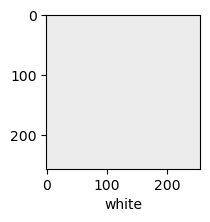

In [43]:
a=np.random.randint(58)
plot_sample(X_test, Y_test, a)
print(classes[y_classes[a]])

(58, 256, 256, 3)

In [44]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


# Function to preprocess the input image to test any image if you want
def preprocess_image(image_path, target_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the target size
    image = cv2.resize(image, (target_size[0], target_size[1]))
    # Normalize the pixel values to the range [0, 1]
    image = image.astype('float32') / 255.0
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    return image

# Define the target size of the input image (must match the input shape of your CNN model)
target_size = (256, 256, 3)  # Adjust this based on your model's input shape

# Path to the image you want to predict
image_path = os.path.join('pinkawi.jpg') 

# Preprocess the input image
preprocessed_image = preprocess_image(image_path, target_size)

# Make predictions using the model
predictions = cnn.predict(preprocessed_image)

# Since you are predicting colors, the output may be a probability distribution
# You can use argmax to get the index of the highest probability as the predicted color
predicted_color_index = np.argmax(predictions[0])

# Get the predicted color label
predicted_color = classes[predicted_color_index]

print(f"The predicted color of the input image is: {predicted_color}")


1/1 [==============================] - 0s 38ms/step
The predicted color of the input image is: pink


In [47]:
# Define a global variable to store the captured image region
captured_region = None

def capture_image_region(image_path):
    global captured_region

    # Load the image
    image = cv2.imread(image_path)
    original_image = image.copy()

    # Create a window to display the image
    #cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow("Image", image)

    # Define the coordinates for the region to capture
    top_left = None
    bottom_right = None

    # Function to handle mouse click events
    def mouse_callback(event, x, y, flags, param):
        nonlocal top_left, bottom_right, image

        if event == cv2.EVENT_LBUTTONDOWN:
            # Set the top-left coordinates
            top_left = (x, y)

        elif event == cv2.EVENT_LBUTTONUP:
            # Set the bottom-right coordinates
            bottom_right = (x, y)

            # Draw a rectangle to show the selected region on the image
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            cv2.imshow("Image", image)

            # Capture the selected region and store it in the global variable
            global captured_region
            captured_region = original_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            captured_region = cv2.cvtColor(captured_region, cv2.COLOR_BGR2RGB)
    # Set the mouse callback function for the "Image" window
    cv2.setMouseCallback("Image", mouse_callback)

    # Wait until a key is pressed and then close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return captured_region



In [48]:
def final_predection (image_path):
    image_to_predict = capture_image_region(image_path)
    image_to_predict = cv2.resize(image_to_predict, (target_size[0], target_size[1]))
    # Normalize the pixel values to the range [0, 1]
    image_to_predict = image_to_predict.astype('float32') / 255.0
    plt.imshow(image_to_predict)
    image_to_predict = np.expand_dims(image_to_predict, axis=0)
    # Make predictions using the model
    predictions = cnn.predict(image_to_predict)

    # Since you are predicting colors, the output may be a probability distribution
    image_to_predict = np.expand_dims(image_to_predict, axis=0)

    # You can use argmax to get the index of the highest probability as the predicted color
    predicted_color_index = np.argmax(predictions[0])

    # Get the predicted color label
    predicted_color = classes[predicted_color_index]

    print(f"The predicted color of the input image is: {predicted_color}")
    
    


1/1 [==============================] - 0s 38ms/step
The predicted color of the input image is: green


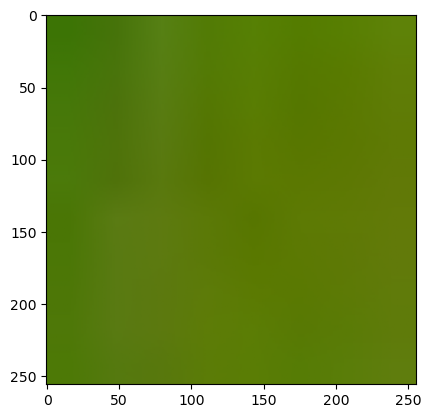

In [57]:
#img=cv2.imread('habibi.jpg')
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)
final_predection('colorpic.jpg')